<center>

<h1> </h1>

<img src="https://capacitacion.centrocoyol.com/wp-content/uploads/2018/08/logoSuperior.png" alt="TECLOGO" height="50" >


Instituto Tecnológico de Costa Rica

Carrera de Ingeniería de Computación

Escuela de Computación

Inteligencia Artificial <br>
<img src="https://sitiobigdata.com/wp-content/uploads/2019/02/google-colab.jpeg" alt="Colab" height="50" >   <br>
Tarea/Quiz 2 <br>
Profesor:Luis Alexander Calvo Valverde<br>
Estudiantes:
<br> Carlos Adrián Gómez Segura
<br> Leonardo Román Montero
            
Primer Semestre<br>
24 de Febrero de 2020

</center>

---
#Introducción
---
El presente trabajo consiste en la exploración de Google Colab, para la inducción del tema de inteligencia artificial. Detro de este "notebook" de 
Google Colab, se hace uso de librerías como Pandas para la carga masiva de 
datos, y la preparación de los mismos para su futura gestión y uso. 
También se hace referencia a librerías para la representación de datos en distintos gráficos para su interprétación y visualizaciones de los mismos.

---
#Conjunto de datos utilizados
---


Monthly Sunspot Dataset

Este conjunto de datos describe un recuento mensual de la cantidad de manchas solares observadas durante poco más de 230 años (1749-1983).

Las unidades son un recuento y hay 2.820 observaciones. La fuente del conjunto de datos se acredita a Andrews y Herzberg (1985).

---
#Capítulo 1
---

Durante este capítulo se detalla las formas para instalar todas las herramientas necesarias para el tratamiento de datos. En este caso, 
para colab corresponde únicamente la importación de las mismas

In [67]:

#Capítulo 1
#Importar las  herramientas necesarias
# estas son las librerías a utilizar en 
# la tarea para el manejo y gestión 
# de datos 

import scipy 
print('scipy %s'%scipy.__version__)

import numpy 
print('numpy %s'%numpy.__version__)

import matplotlib 
print('matplotlib %s'%matplotlib.__version__)

import pandas 
print('pandas %s'%pandas.__version__)

import statsmodels 
print('statsmodels %s'%statsmodels.__version__)

import sklearn 
print('sklearn %s'%sklearn.__version__)




scipy 1.4.1
numpy 1.17.5
matplotlib 3.1.3
pandas 0.25.3
statsmodels 0.10.2
sklearn 0.22.1


---
#Capítulo 2 y 3 
---
Durante el segundo capítulo se habla acerca de conceptos generales acerca de Forescasting de las series
ciertos componentes acerca de este tema como la moda, el nivel, hasta el ruido de los datos. 

Seguidamente,  en el capítulo tres explican el uso de distintas técnicas para el tratamiento de datos en el aprendizaje supervisado.

---
#Capítulo 4 
---
En el capítulo 4, explican el uso de librerías para la carga masiva de datos, la organización de los mismos cuando se cargan y el cálculo de distintas estadísticas sobre los distintos datos que se cargaron.

In [68]:
# Capítulo 4
url = "https://raw.githubusercontent.com/xXYo-NachoXx/TareaIA2/master/monthly-sunspots.csv"

#Carga masiva de datos con pandas

print("Imprimir los resultados")
#Imprimir los primeros resultados
series = pandas.read_csv(url,header =  0 )
print(series.head())

print("\n Imprimir los resultados con parsing de datos")
#Imprimir parseando los resultados
series2 = pandas.read_csv(url,header =0,parse_dates=[0], index_col=0 , squeeze=True)
print(type(series2))
print(series2.head())

print("\n Resumir las líneas")
#Resumir las líneas 
print(series.head(10))

print("\n Número de observaciones")
#Imprimir el número de observaciones
cantidad = series.size 
print(cantidad)

print("\n Obtener observaciones según fecha")
#Imprimir las observaciones requeridas 
print(series2.get(key='1959-01'))


print("\n Obtener descripciones ")
#Imprimir parámetros de las observaciones 
print(series.describe())
# entre ellos el mínimo, el máximo, entre otros








Imprimir los resultados
     Month  Sunspots
0  1749-01      58.0
1  1749-02      62.6
2  1749-03      70.0
3  1749-04      55.7
4  1749-05      85.0

 Imprimir los resultados con parsing de datos
<class 'pandas.core.series.Series'>
Month
1749-01-01    58.0
1749-02-01    62.6
1749-03-01    70.0
1749-04-01    55.7
1749-05-01    85.0
Name: Sunspots, dtype: float64

 Resumir las líneas
     Month  Sunspots
0  1749-01      58.0
1  1749-02      62.6
2  1749-03      70.0
3  1749-04      55.7
4  1749-05      85.0
5  1749-06      83.5
6  1749-07      94.8
7  1749-08      66.3
8  1749-09      75.9
9  1749-10      75.5

 Número de observaciones
1440

 Obtener observaciones según fecha
None

 Obtener descripciones 
         Sunspots
count  720.000000
mean    50.858750
std     39.650488
min      0.000000
25%     20.150000
50%     43.000000
75%     71.775000
max    238.900000


---
#Capítulo 5 
---
En este capítulo, se demuestran los conocimientos técnicos acerca de la ingeniría de datos, se presentan al aplicar ciertas features en distintas 
series de tiempo
Entre otras técnicas que se muestran en
en el capítulo son Sliding Window y Lag Sofisticado  


In [69]:
#Capítulo 5

# Se acomodan los datos en un data frame según columnas específicas
print("Segundo ejemplo de observaciones \n")
url = 'https://raw.githubusercontent.com/xXYo-NachoXx/TareaIA2/master/monthly-sunspots.csv'
series = pandas.read_csv(url, header=0)
#Se crea un dataframe para el dataset transformado
dataframe = pandas.DataFrame()
#Transformar la columna de fecha en una variable tipo datetime
series['Month']= pandas.to_datetime(series['Month'])
dataframe['year'] = series['Month'].dt.year
dataframe['month'] = series['Month'].dt.month
dataframe['sunpots'] = series['Sunspots']
print(dataframe.head(10))



# Para la comparación de los datos 
#Datos de concatenados para las series de datos 
print("\n Concatenación de resultados")
temps =pandas.DataFrame(series.values)
temps.columns = ['Month' , 'Sunspots']
temps = temps.drop(['Month'], axis = 1)
dataframe2 = pandas.concat([temps.shift(1),temps],axis = 1)
dataframe2.columns = ['t', 't+1'] 
print(dataframe2.head(5))


#Datos de concatenados para las series de datos II pero en 4 columnas 
print("\n Concatenación de resultados II")
temps =pandas.DataFrame(series.values)
temps.columns = ['Month' , 'Sunspots']
temps = temps.drop(['Month'], axis = 1) 
dataframe3 = pandas.concat([temps.shift(3),temps.shift(2),temps.shift(1),temps],axis = 1)
dataframe3.columns = ['t-2', 't-1', 't', 't+1'] 
print(dataframe3.head(5))


#Aplicación de la técnica de Rolling window en los datos 
print("\n Ejemplo de rolling window ")
series = pandas.read_csv(url, header=0, index_col = 0, parse_dates =  True  , squeeze =  True )
temps =pandas.DataFrame(series.values)
dataframe4 =pandas.DataFrame()
shifted = temps.shift(1)
window  = shifted.rolling(window = 2)
means =window.mean()
dataframe4 = pandas.concat([means,temps],axis = 1)
dataframe4.columns = [   'mean(t-1,t)' , 't+1']
print(dataframe4.head(5))


#Concarenación de estadísiticas o descripciones en los datos 
print("\n Ejemplo de Estadísticas")
width  =  3 
shifted =  temps.shift(width-1)
window =  shifted.rolling(window = width)
dataframe4 = pandas.concat([window.min(),window.mean(), window.max(),temps],axis = 1)
dataframe4.columns = [ 'min' , 'mean' , 'max' , 't+1']
print(dataframe4.head(5))


#Expansión de las características de los datos 
print("\n Expansión de funcionalidades")
temps =pandas.DataFrame(series.values)
window =  temps.expanding()
dataframe4 = pandas.concat([window.min(),window.mean(), window.max(),temps],axis = 1)
dataframe4.columns = [ 'min' , 'mean' , 'max' , 't+1']
print(dataframe4.head(5))




Segundo ejemplo de observaciones 

   year  month  sunpots
0  1749      1     58.0
1  1749      2     62.6
2  1749      3     70.0
3  1749      4     55.7
4  1749      5     85.0
5  1749      6     83.5
6  1749      7     94.8
7  1749      8     66.3
8  1749      9     75.9
9  1749     10     75.5

 Concatenación de resultados
      t   t+1
0   NaN    58
1    58  62.6
2  62.6    70
3    70  55.7
4  55.7    85

 Concatenación de resultados II
    t-2   t-1     t   t+1
0   NaN   NaN   NaN    58
1   NaN   NaN    58  62.6
2   NaN    58  62.6    70
3    58  62.6    70  55.7
4  62.6    70  55.7    85

 Ejemplo de rolling window 
   mean(t-1,t)   t+1
0          NaN  58.0
1          NaN  62.6
2        60.30  70.0
3        66.30  55.7
4        62.85  85.0

 Ejemplo de Estadísticas
    min       mean   max   t+1
0   NaN        NaN   NaN  58.0
1   NaN        NaN   NaN  62.6
2   NaN        NaN   NaN  70.0
3   NaN        NaN   NaN  55.7
4  58.0  63.533333  70.0  85.0

 Expansión de funcionalidades


---
#Capítulo 6
---

Finalmente en este último capítulo de la lectura sería se desmuestran las formas de representar los datos obtenidos de forma gráfica en distintas distribuciones como histogramas, gráficos de densidad, entre otros.

Ejemplo de plots 


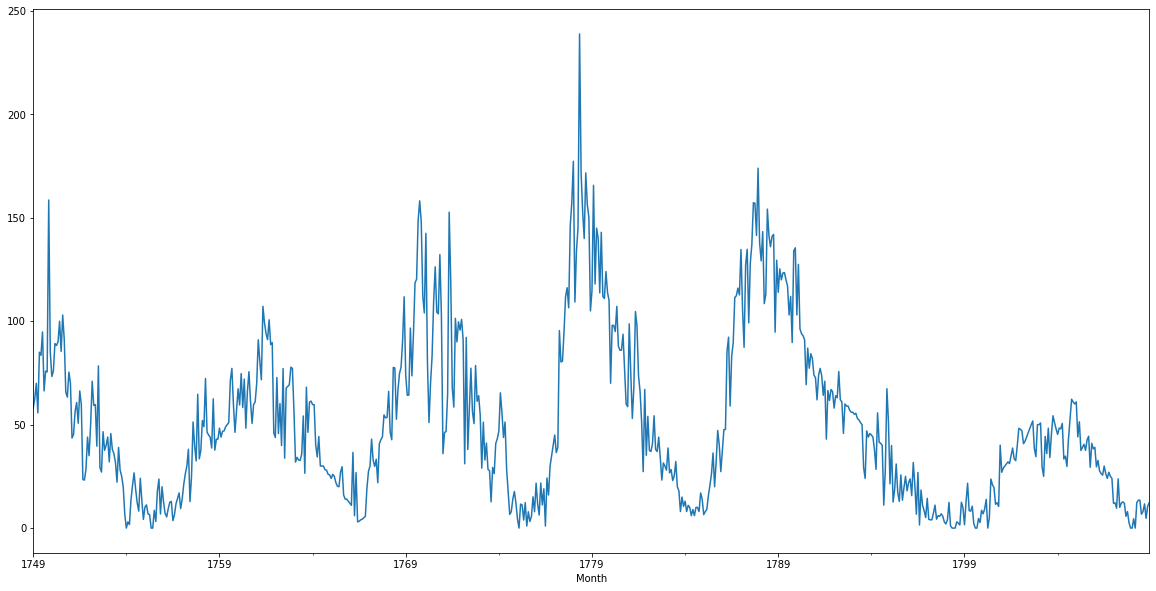

Segundo Ejemplo de plots 


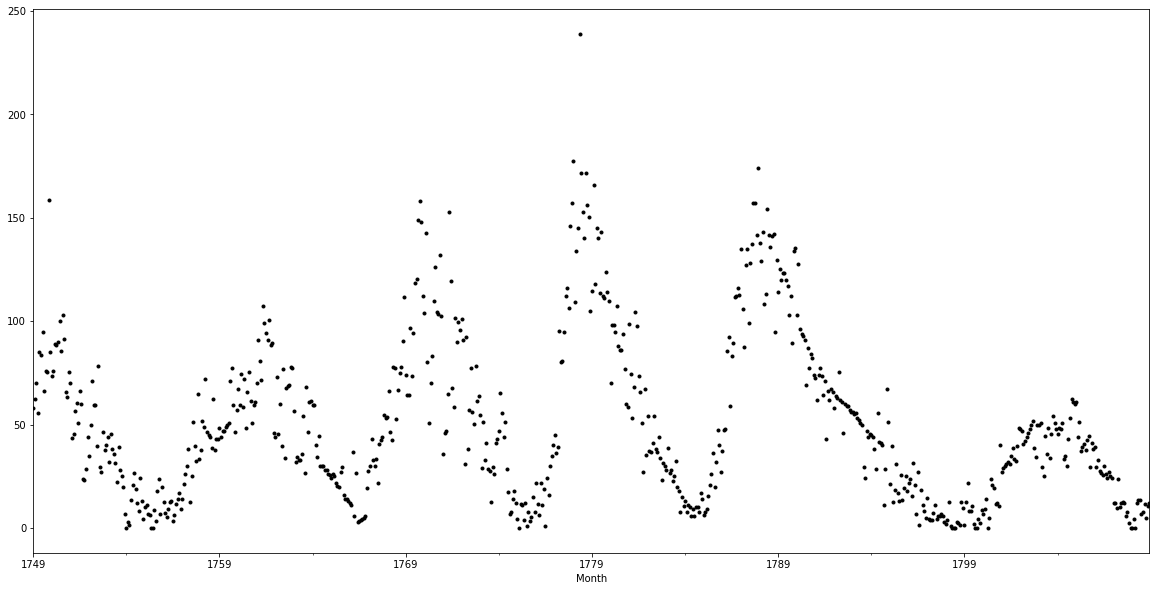

Tercer Ejemplo de plots 


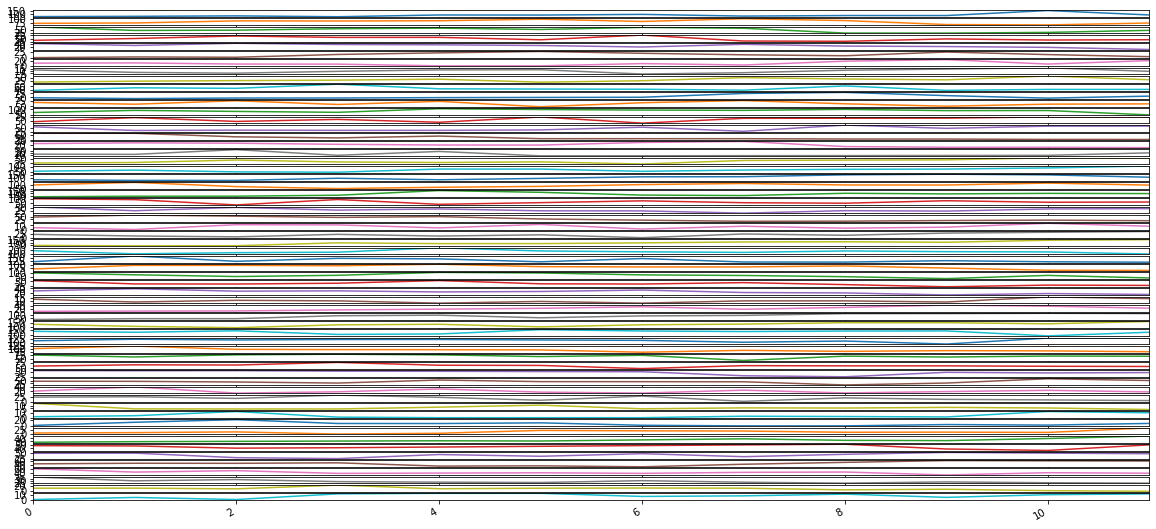

Cuarto Ejemplo de plots 


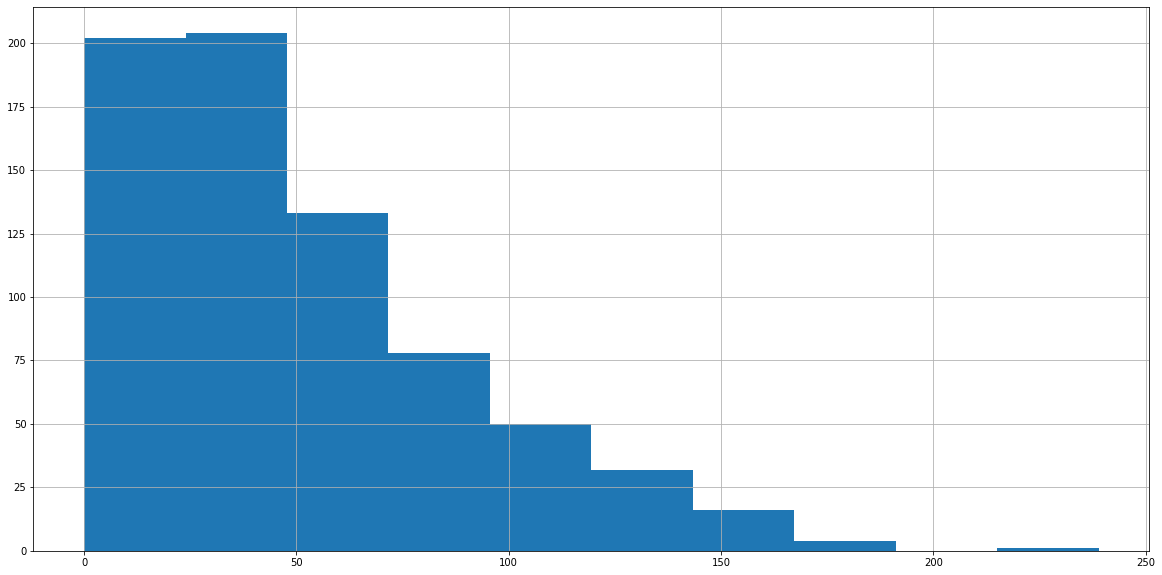

Quinto Ejemplo de plots 


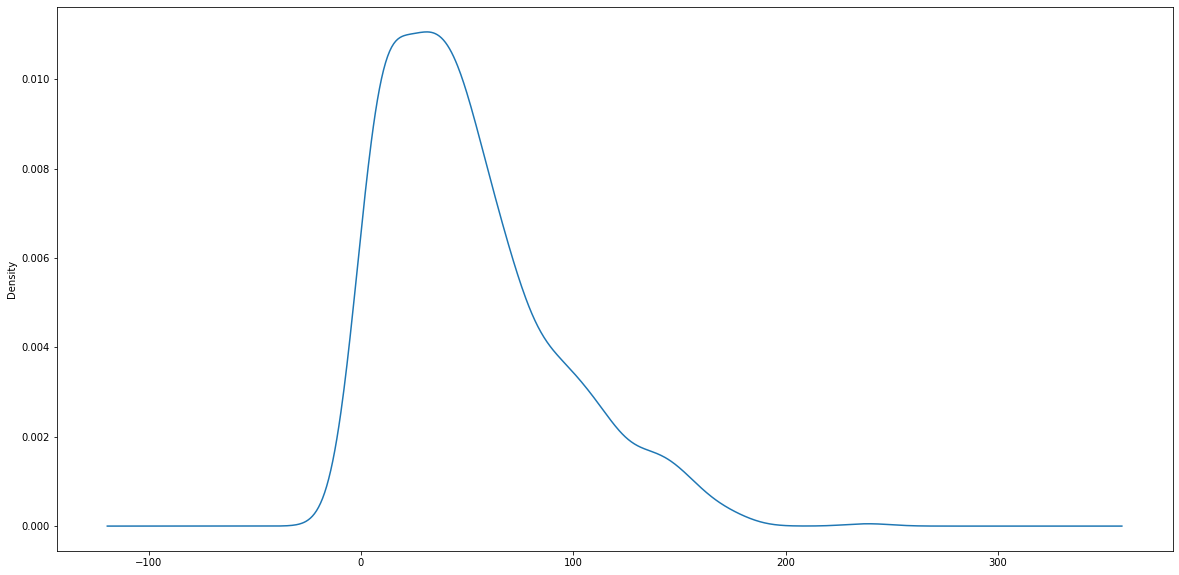

Sexto Ejemplo de plots 


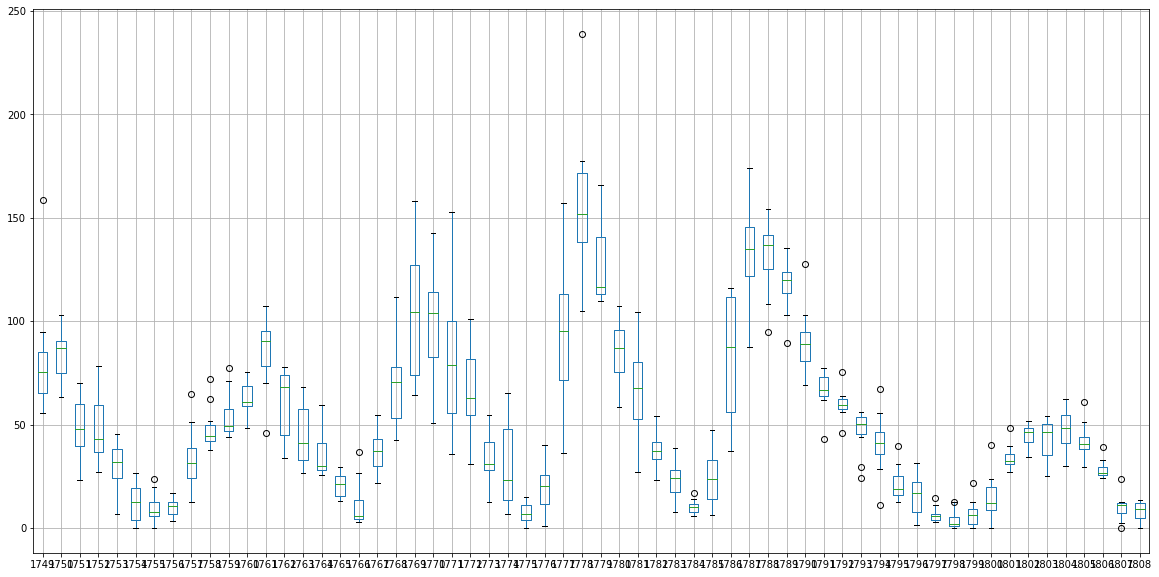

Sétimo Ejemplo de plots 


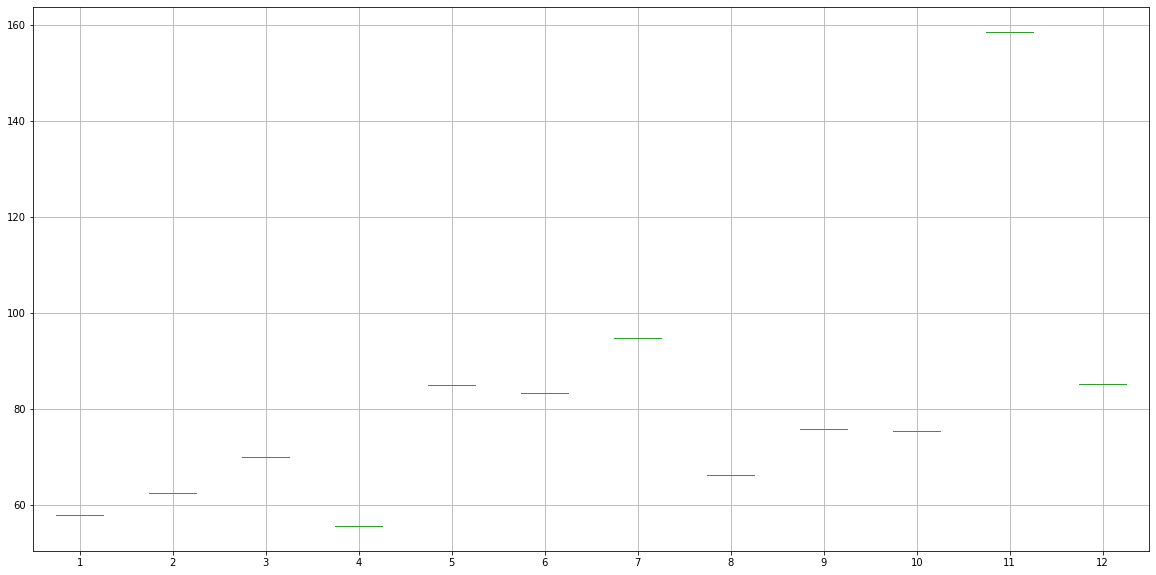

Octavo Ejemplo de plots 


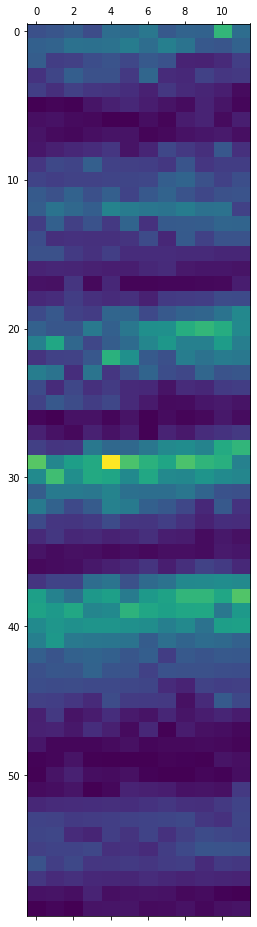

Noveno Ejemplo de plots 


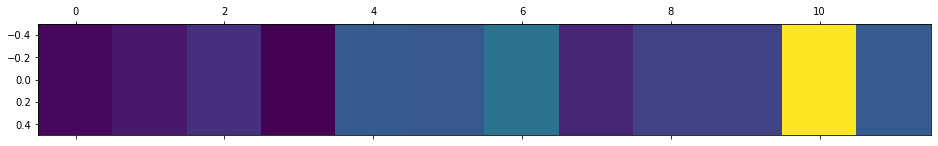

Décimo Ejemplo de plots 


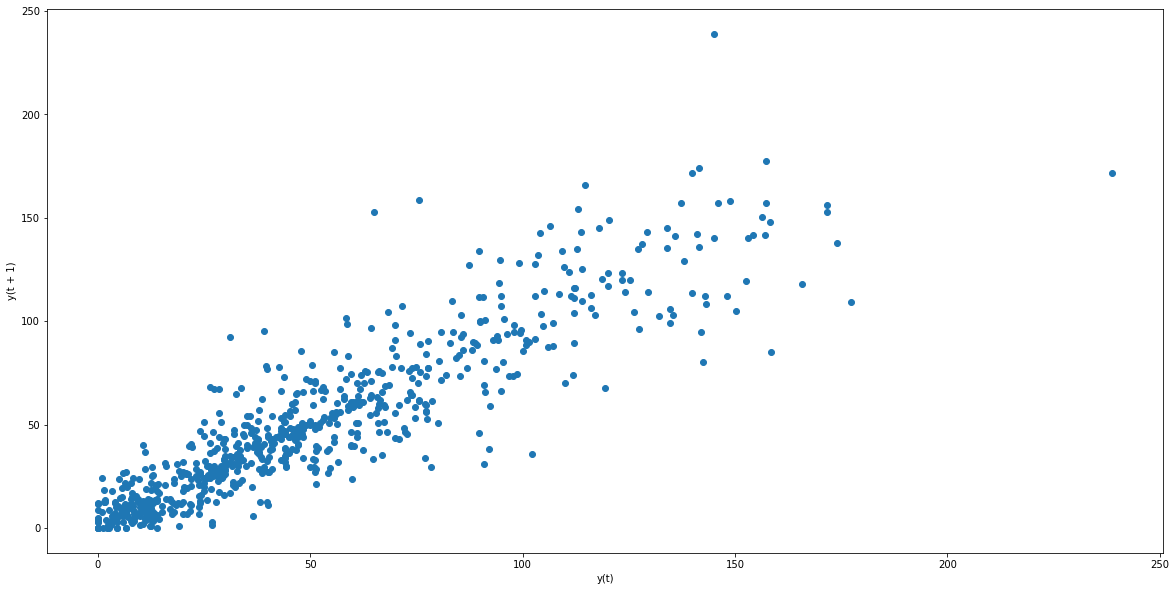

Undécimo Ejemplo de plots 


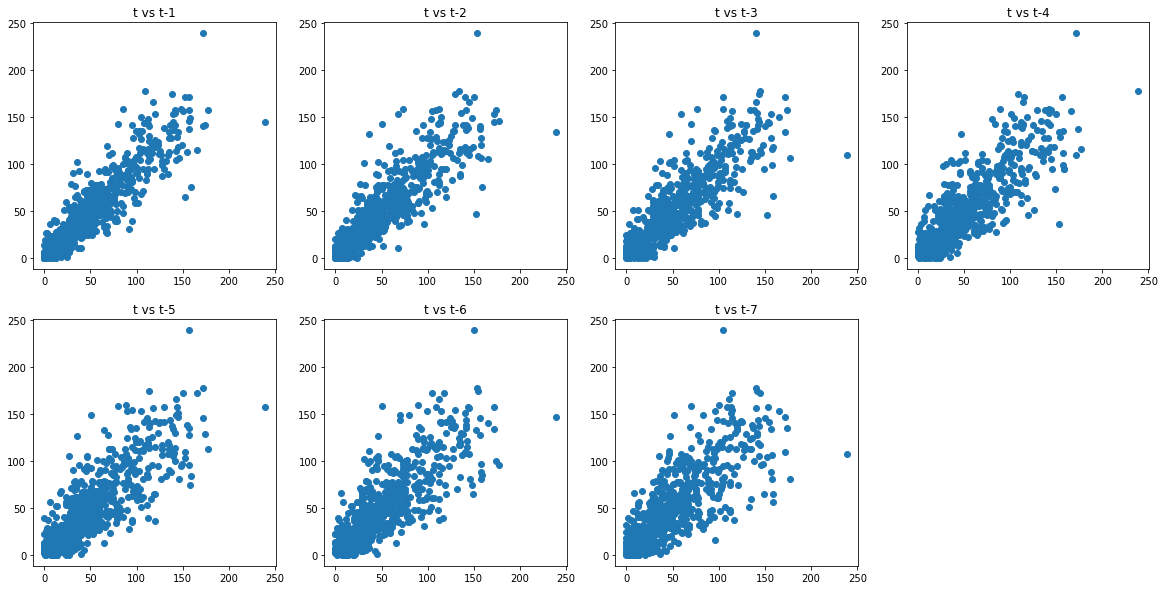

Duodécimo Ejemplo de plots 


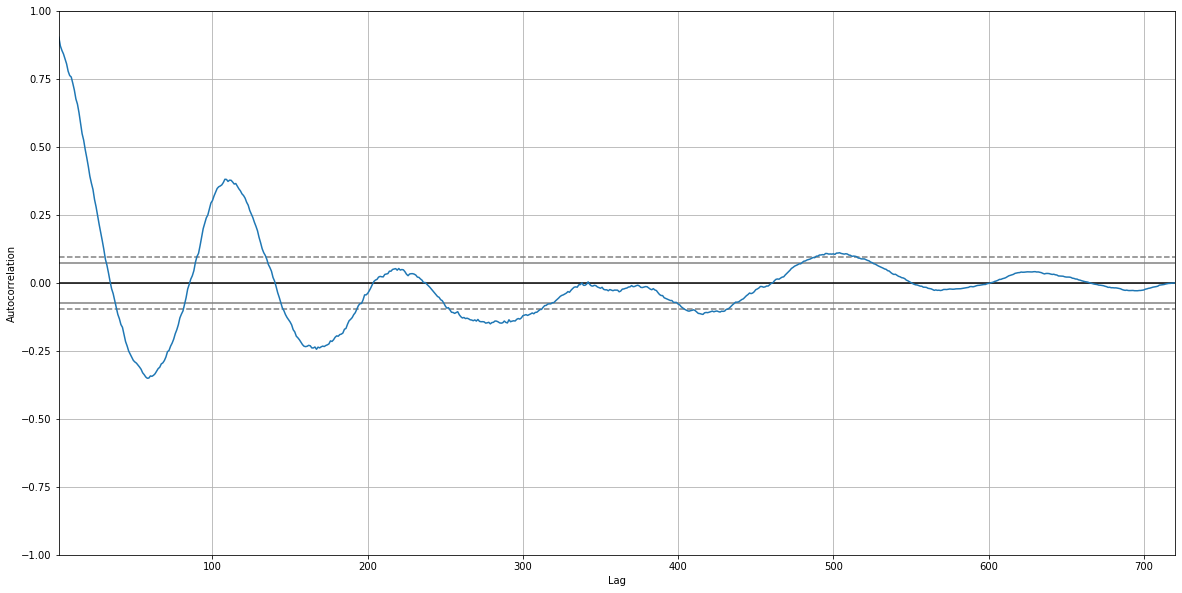

In [70]:
#Capítulo 6   Plots de información 
#libreria para el dibujo de datos
from matplotlib import pyplot
from pandas.plotting import lag_plot

#Hacer los gráficos más grandes
pyplot.rcParams["figure.figsize"] = (20,10)

print("Ejemplo de plots ")
url = 'https://raw.githubusercontent.com/xXYo-NachoXx/TareaIA2/master/monthly-sunspots.csv'
series = pandas.read_csv(url, header=0, index_col = 0, parse_dates =  True  , squeeze =  True )
series.plot()
pyplot.show()


print("Segundo Ejemplo de plots ")
series = pandas.read_csv(url, header=0, index_col = 0, parse_dates =  True  , squeeze =  True )
series.plot(style = 'k.' )
pyplot.show()


print("Tercer Ejemplo de plots ")
series = pandas.read_csv(url, header=0, index_col = 0, parse_dates =  True  , squeeze =  True )
groups =  series.groupby(pandas.Grouper(freq= 'A'))
years =  pandas.DataFrame()
for name, group in groups:
    years[name.year] = group.values 
years.plot(subplots = True,  legend = False)
pyplot.show()

print("Cuarto Ejemplo de plots ")
series = pandas.read_csv(url, header=0, index_col = 0, parse_dates =  True  , squeeze =  True )
series.hist()
pyplot.show()

print("Quinto Ejemplo de plots ")
series = pandas.read_csv(url, header=0, index_col = 0, parse_dates =  True  , squeeze =  True )
series.plot(kind  = 'kde' )
pyplot.show()



print("Sexto Ejemplo de plots ")
series = pandas.read_csv(url, header=0, index_col = 0, parse_dates =  True  , squeeze =  True )
groups =  series.groupby(pandas.Grouper(freq= 'A'))
years =  pandas.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
pyplot.show()


print("Sétimo Ejemplo de plots ")
series = pandas.read_csv(url, header=0, index_col = 0, parse_dates =  True  , squeeze =  True )
one_year = series['1749']
groups =  one_year.groupby(pandas.Grouper(freq= 'M'))
months =  pandas.concat([pandas.DataFrame(x[1].values)for x in groups], axis =  1)
months =  pandas.DataFrame(months)
months.columns =  range(1,13)
months.boxplot()
pyplot.show()


print("Octavo Ejemplo de plots ")
series = pandas.read_csv(url, header=0, index_col = 0, parse_dates =  True  , squeeze =  True )
groups =  series.groupby(pandas.Grouper(freq= 'A'))
years =  pandas.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years = years.T
pyplot.matshow(years,interpolation = None, aspect = 'auto')
pyplot.show()

print("Noveno Ejemplo de plots ")
series = pandas.read_csv(url, header=0, index_col = 0, parse_dates =  True  , squeeze =  True )
one_year = series['1749']
groups =  one_year.groupby(pandas.Grouper(freq= 'M'))
months =  pandas.concat([pandas.DataFrame(x[1].values)for x in groups], axis =  1)
months =  pandas.DataFrame(months)
months.columns =  range(1,13)
pyplot.matshow(months,interpolation = None, aspect = 'auto')
pyplot.show()

print("Décimo Ejemplo de plots ")
series = pandas.read_csv(url, header=0, index_col = 0, parse_dates =  True  , squeeze =  True )
lag_plot(series)
pyplot.show()



print("Undécimo Ejemplo de plots ")
series = pandas.read_csv(url, header=0, index_col = 0, parse_dates =  True  , squeeze =  True )
values = pandas.DataFrame(series.values)
lags= 7
columns =  [values]
for i in range (1,(lags+1)):
  columns.append(values.shift(i))
dataframe = pandas.concat(columns, axis = 1)
columns = ['t']
for i in range (1, (lags+1)):
  columns.append('t-'+ str(i))
dataframe.columns= columns
pyplot.figure(1)
for i in range (1,(lags+1)):
  ax =  pyplot.subplot(240+i)
  ax.set_title('t vs t-' +str(i))
  pyplot.scatter(x= dataframe['t'].values, y =  dataframe['t-' + str(i)].values)
pyplot.show()


#importacion de autocorrelation_plot
from pandas.plotting import autocorrelation_plot
print("Duodécimo Ejemplo de plots ")
#Rolling window
series = pandas.read_csv(url, header=0, index_col = 0, parse_dates =  True  , squeeze =  True )
autocorrelation_plot(series)
pyplot.show()

